
# Investigation into Oil production, GDP/capita and Equality

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report will explore country data on GDP/capita, and inequality (GINI index), and oil production. I am curious about the relationships among these and how they have developed over time. I started this project with some assumptions. I assume that both oil production and GDP/capita have grown substantially over the last decades and that they are tightly correlated. This is intuitive, because conomic growth increases demand for oil and high oil production will consitute a high contribution to the economy. However, I did not know what to expect among relationships between oil producing countries in respect to GDP and inequality. I did not know whether oil producing countries in general are richer or poorer than other countries. The oil production would be contribute to GDP, but perhaps oil production may interfere with the diversification of the economy among less developed countries. Furthermore, I was even more unsure about oil production and equality. On one hand, oil production would increase inequality if it stays in the hands of a few, but could also increase the states' ability to redistribute wealth.

>I used three csv files from Gapminder websie, from the most recent data sets with the following file names: 'oil_production_total.csv','inequality_index_gini.csv', and 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv'.

In [418]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> Cleaning of the data has two main parts. In one part, I will look at GDP/capita and oil production over time. Oil production is only measured from 1965 - 2016, so I will eliminate measurements in the GDP data that are beyond this range. I will divide the data into two groups: Oil producing countries and countries overall. I will transpose the tables in order to make it easier to use the .plot method and change the year to datetime objects. 

In the second part, I will eliminate time as a variable. To do this,  I must either select one point of time or aggredate the data. I have chosen to aggregate. The following variables were created: Total of all oil production per country from 1965 - 2016, mean GDP/capita from 1965 - 2016, and mean GINI index from 1979 to 2016. The GINI index time period does not correspond exactly with the other period because it is a relatively new way to measure equality, but these time periods are close enough for the relationships to provide insight. 

Note = GINI index is a measurement from 0% - 100%. 0% indicates perfect equalilty while 100% equals extreme inequality.

Column names for all data sets are years, and the row names are countries. The range of years and numbers of countries included vary.

In [419]:
oil = pd.read_csv('oil_production_total.csv')
gini = pd.read_csv('inequality_index_gini.csv')
gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')


   ## Cleaning Part One: Transposing the data sets

In [420]:
##GDP data is limited to 1965- 2016 and transposed
gdp = gdp[oil.columns]
gdp_trans = gdp.set_index('country').T.rename_axis('Date').rename_axis( None, axis="columns")
gdp_trans.index= pd.to_datetime(gdp_trans.index).year


In [421]:
## oil producer's gdp is isolated from global gdp
gdp_oil_trans = gdp_oil.set_index('country').T.rename_axis('Date').rename_axis( None, axis="columns")
gdp_oil_trans.index= pd.to_datetime(gdp_oil_trans.index).year
gdp_oil = gdp[gdp['country'].isin(oil['country'])]
gdp_oil_trans.head()

,Algeria,Angola,Argentina,Australia,Azerbaijan,Brazil,Brunei,Canada,Chad,China,...,Trinidad and Tobago,Tunisia,Turkmenistan,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Vietnam,Yemen
Date,,,,,,,,,,,,,,,,,,,,,
1965,5960,4960,10300,16600,6010,4670,72900,17300,1390,774,...,9110,2720,8290,8350,15400,21400,2780,14000,1260,1460
1966,5520,5170,10200,16700,6240,4840,74200,18100,1330,829,...,9380,2730,8600,14200,15600,22500,2880,13800,1230,1480
1967,5860,5390,10400,17600,6460,4890,75400,18300,1310,722,...,9510,2650,8890,24100,15900,22800,2980,14200,1050,1500
1968,6370,5230,10700,18300,6780,5220,76700,19000,1280,671,...,9980,2870,9330,29000,16500,23600,3120,14700,1000,1510
1969,6810,5300,11400,18900,6820,5560,78000,19700,1340,735,...,10300,2920,9380,34800,16800,24100,3140,14700,1060,1530


In [422]:
## oil data transposed
oil_trans = oil.set_index('country').T.rename_axis('date').rename_axis( None, axis="columns")
oil_trans.index= pd.to_datetime(oil_trans.index, format = '%Y').year

  ## Cleaning Part Two: Aggregating into one table

In [470]:
## new variable names were assigned to the raw dataframes to keep them from interferring with the operations above. 
##Again, the GDP data is limited to 1965 - 2016.
oil1 = pd.read_csv('oil_production_total.csv')
gini1 = pd.read_csv('inequality_index_gini.csv')
gdp1 = pd.read_csv('income_per_person_gdppercapita.csv')
gdp1 = gdp1[oil1.columns]

In [471]:
##new columns are added to the gdp and oil dataframes
oil1['total_oil'] = oil1.sum(axis = 1)
gdp1['mean_gdp'] = gdp1.mean(axis=1)
gini1['mean_gini'] = gini1.mean(axis = 1)

In [472]:
## The tables are merged and then a new dataframe is created including only country and the aggregated columns. 
##A round method was also used for readability.
merge1 = gdp1.merge(oil1, how = 'left', left_on='country', right_on = 'country')
merge2 = merge1.merge(gini1, how = 'left', left_on = 'country', right_on = 'country')
agg_df =merge2[['country', 'mean_gdp', 'mean_gini', 'total_oil']]
agg_df = agg_df.round(2)
df1 = agg_df[agg_df['mean_gini'].isnull()]


In [473]:
## Null values in the total oil column are filled with 0.
## Null values in the mean gini column are filled with the mean of all rows in that column.
agg_df['total_oil'].fillna(0, inplace = True)
agg_df['mean_gini'].value_counts()
avg_gini = agg_df['mean_gini'].mean()
agg_df['mean_gini'].fillna(avg_gini, inplace = True)
agg_df.head()

,country,mean_gdp,mean_gini,total_oil
0,Afghanistan,1222.81,39.646375,0.000000e+00
1,Albania,5616.92,29.660000,0.000000e+00
2,Algeria,10123.46,34.370000,3.047000e+09
3,Andorra,33146.15,39.646375,0.000000e+00
4,Angola,4686.35,47.350000,1.726073e+09


#### Note about filling the null values: 
#### Null values in total_oil are filled with 0. I am making the assumption that countries that are not present in the Oil production data set produce no oil, athough this may be incorrect.

#### 33 out of 193 countries are missing from the GINI index data. I filled values for countries that have no GINI measurements with the mean of the mean GINI index. Some major oil producers are among those that are missing GINI values, so the usefulness for finding relationships between oil production and inequality is limited.  

<a id='eda'></a>
## Exploratory Data Analysis



## Research Question 1: How have oil production and GDP/capita changed since 1965 global GDP and how does GDP/capita for oil producing countries compare to GDP/capita to all countries?

Text(0, 0.5, 'Tonnes Oil Equvalent')

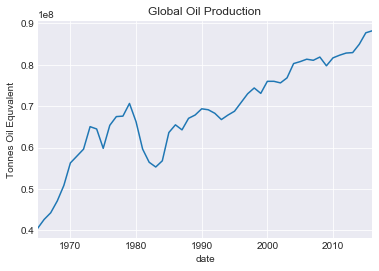

In [474]:
## A line graph is produced to show the change in oil production since 1965.
plt.style.use('seaborn-darkgrid')
oil_trans.mean(axis = 1).plot()
plt.title("Global Oil Production")
plt.ylabel('Tonnes Oil Equvalent')

### Oil production has grown fairly steadily  since 1965 but there was a steep fall around 1980.

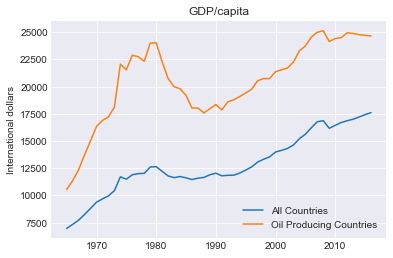

In [475]:
## A line graph is produced including GDP/capita data for both all countries as well as just oil producing countries.
y1 = gdp_trans.mean(axis = 1)
y2 = gdp_oil_trans.mean(axis = 1)
plt.title("GDP/capita")
plt.ylabel('International dollars')
all_countries = plt.plot(y1)
oil_producing_countries = plt.plot(y2)
plt.legend( ['All Countries', 'Oil Producing Countries'])

### Global GDP/capita has risen strongly since 1965
### Oil Producers' GDP/capita has also increased, but has done so less steadily. It peaked in 1980 and did not reach the the same level again until 2005. 

Text(0.5, 1.0, 'Average GDP/capita')

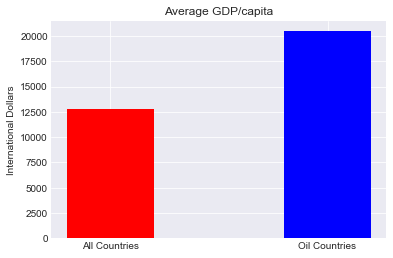

In [476]:
## A bar graph is created from the GDP/capita data by finding the mean of means of all countries as well as just oil producing countries. 
oil_gdp = gdp_oil.mean().mean()
global_gdp = gdp.mean().mean()
height = [global_gdp, oil_gdp]
bars = ('All Countries', 'Oil Countries')
y_pos = np.arange(len(bars))
plt.bar(y_pos,height, width = .4, color = ['red', 'blue'])
plt.ylabel('International Dollars')
plt.xticks(y_pos, bars)
plt.title('Average GDP/capita')


### Oil countries have a higher GDP/capita than countries overall.

## Question 2: How do different levels of oil production relate to GDP/capita and equality? Does the amount of oil production matter for GDP/capita and equality? Are the relationships different for lower income countries than higher income countries?

In [477]:
##  Quartiles are found so that I can group by the level of total oil production.  
oil1.sum(axis = 1).describe()
oil1.shape

(49, 54)

In [478]:
## a function is created to divide oil producers into levels of production by quartile as well as "none" for no oil production 
## and to create a new column.
def oil_level(total_oil):
    if total_oil >= 7.608400e+09:
        return '4th quartile'
    elif total_oil >= 2.706020e+09 and total_oil < 7.608400e+09:
        return '3rd quartile'
    elif total_oil >=7.897000e+08 and total_oil <2.706020e+09:
        return '2nd quartile'
    elif total_oil >2 and total_oil <=7.897000e+08:
        return '1st quartile'
    else:
        return 'none'

agg_df['oil_prod_level'] = agg_df['total_oil'].apply(oil_level)
agg_df['oil_prod_level'].value_counts()

none            144
1st quartile     20
3rd quartile     13
2nd quartile     12
4th quartile      4
Name: oil_prod_level, dtype: int64

Text(0, 0.5, 'GINI Index(%)')

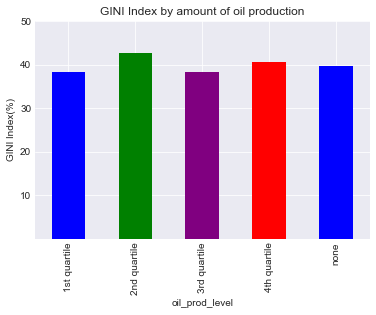

In [439]:
oil_level = agg_df.groupby(['oil_prod_level']).mean()
oil_plot = oil_level.plot(y = 'mean_gini', kind = 'bar', yticks = [10,20,30, 40, 50], color = ['blue', 'green', 'purple', 'red'], legend = False)
oil_plot.set_title('GINI Index by amount of oil production')
oil_plot.set_ylabel('GINI Index(%)')

### The equality index is similar for all levels of oil production. There does not seem to be a strong relationship between inequality and oil production. 

In [441]:
## So that I can find out whethere GDP/capita may influence the relationship between oil and equality, 
##the mean is identified so that I can group by two levels of GDP.
gdp1.mean(axis = 1).describe()


count       193.000000
mean      12815.568653
std       16210.232166
min         585.634615
25%        2657.307692
50%        6786.923077
75%       16260.769231
max      108390.384615
dtype: float64

Text(0.5, 1.0, 'GINI index grouped by Oil Production and GDP')

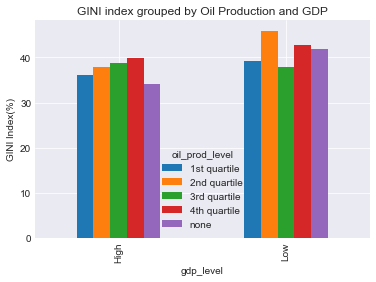

In [479]:
## An additional column is created to group by high and low GDP/capita. 
##A bar graph is created to see if a trend between equality and oil production can be found in one of the GDP groups.
def gdp_level(meangdp):
    if meangdp >= 12815.568653:
        return 'High'
    else:
        return 'Low'
    
agg_df['gdp_level'] = agg_df['mean_gdp'].apply(gdp_level)

oil_gdp_level = agg_df.groupby(['gdp_level', 'oil_prod_level']).mean()
oil_gdp_plot = oil_gdp_level.unstack().plot(y = 'mean_gini', kind='bar')
oil_gdp_plot.set_ylabel('GINI Index(%)')
oil_gdp_plot.set_title('GINI index grouped by Oil Production and GDP')

In [443]:
agg_df[agg_df['oil_prod_level']=='4th quartile']

,country,mean_gdp,mean_gini,total_oil,gdp_level,oil_prod_level
77,Iran,12799.62,42.760000,9.459100e+09,Low,4th quartile
140,Russia,18223.08,40.210000,1.449500e+10,High,4th quartile
145,Saudi Arabia,51267.31,39.646375,2.030800e+10,High,4th quartile
184,United States,37451.92,39.650000,2.237100e+10,High,4th quartile


<a id='conclusions'></a>
## Conclusions

> GDP/capita and oil production have both increased dramatically since 1965. Oil producing countries have a higher GDP/capita than all countries' GDP/capita

> GDP/capita in oil producing countries has risen less steadily than in countries as a whole. The relationship between oil countries' GDP and oil production is less closs than I expected. There was a peak in GDP around 1980 that was not reached again until 2005. This peak seems to be visible but somewhat muted in the GDP data from all countries.

>Oil production is not a good predictor of equality. Among higher income countries, the highest level of equality is found in countries that do not produce oil. 

>Limitations
There are only 49 oil producing countries, and the countries are very diverse in many aspects. 
Furthermore, GINI data is lacking for many countries. Saudi Arabia does not have GINI data, and it is one of the four countries in the top quartile of oil production. 
Conclusions about relationships between variables were made based on visual appearance of the graphs. No statistical anaysis was performed.
